___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___

# Finance Data Project 

In this data project we will focus on exploratory data analysis of stock prices. This project is just meant to practice my visualization and pandas skills, it is not meant to be a robust financial analysis or be taken as financial advice.

____
We'll focus on bank stocks and see how they progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2016.

## Getting the Data

In this section we will learn how to use pandas to directly read data from the IEX using pandas!


*Note: [we'll need to install pandas-datareader for this to work!](https://github.com/pydata/pandas-datareader) Pandas datareader allows us to [read stock information directly from the internet](http://pandas.pydata.org/pandas-docs/stable/remote_data.html) .*

### The Imports


In [1]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
%matplotlib inline

## Data

We need to get data using pandas datareader. We will get stock information for the following banks:
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo


In [2]:
import os
os.environ["IEX_API_KEY"] = "pk_39b5328864b84ee486af78521b5db8ee"
#Star and end
start = datetime.datetime(2007, 1, 1)
end = datetime.datetime(2017, 1, 1)
#DataFrames
BAC = data.DataReader("BAC", 'iex', start, end)
C = data.DataReader("C", 'iex', start, end)
GS = data.DataReader("GS", 'iex', start, end)
JPM = data.DataReader("JPM", 'iex', start, end)
MS = data.DataReader("MS", 'iex', start, end)
WFC = data.DataReader("WFC", 'iex', start, end)

In [3]:
C.columns

Index(['open', 'high', 'low', 'close', 'volume'], dtype='object')

** Creating a list of the ticker symbols (as strings) in alphabetical order.**

In [4]:
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

** Concatenating the bank dataframes together to a single data frame called bank_stocks. We'll set the keys argument equal to the tickers list.**

In [8]:
bank_stocks = pd.concat([BAC,C,GS,JPM,MS,WFC],axis=1,keys=tickers)
bank_stocks.head()

BAC                                       C                \
             open   high    low  close      volume   open   high    low   
date                                                                      
2007-01-03  53.40  54.18  52.99  53.33  16028300.0  55.66  56.28  54.72   
2007-01-04  53.33  53.89  53.05  53.67  13236800.0  55.25  56.15  54.72   
2007-01-05  53.59  53.59  53.03  53.24  10205000.0  55.00  55.05  54.46   
2007-01-08  53.46  53.64  52.80  53.45   9685900.0  54.60  55.15  54.30   
2007-01-09  53.60  53.71  52.97  53.50  12550500.0  55.01  55.15  54.19   

                               ...       MS                             \
            close      volume  ...     open     high      low    close   
date                           ...                                       
2007-01-03  55.25  22821100.0  ...  67.8648  68.1878  66.9453  67.6080   
2007-01-04  55.06  16586800.0  ...  67.3181  68.2541  66.6803  67.8482   
2007-01-05  54.77  13178800.0  ...  67.3843  67.5831  66.5643  66.9785   
2007-01-08  55.05  12495200.0  ...  66.7714  67.6080  66.2992  67.3843   
2007-01-09  54.57  19658100.0  ...  67.2601  67.7985  66.8625  67.2270   

                            WFC                                   
                  volume   open   high    low  close      volume  
date                                                              
2007-01-03  5.814618e+06  35.93  36.01  35.37  35.74  12449200.0  
2007-01-04  6.082266e+06  35.74  36.02  35.54  35.80  11065800.0  
2007-01-05  5.643188e+06  35.79  35.83  35.51  35.60  10329200.0  
2007-01-08  5.858562e+06  35.61  35.89  35.39  35.50  11651500.0  
2007-01-09  6.107015e+06  35.58  35.85  35.48  35.59  10160200.0  

[5 rows x 30 columns]

** Setting the column name levels (this is filled out for you):**

In [11]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

** Checking the head of the bank_stocks dataframe.**

In [7]:
bank_stocks.head()

Bank Ticker    BAC                                       C                \
Stock Info    open   high    low  close      volume   open   high    low   
date                                                                       
2007-01-03   53.40  54.18  52.99  53.33  16028300.0  55.66  56.28  54.72   
2007-01-04   53.33  53.89  53.05  53.67  13236800.0  55.25  56.15  54.72   
2007-01-05   53.59  53.59  53.03  53.24  10205000.0  55.00  55.05  54.46   
2007-01-08   53.46  53.64  52.80  53.45   9685900.0  54.60  55.15  54.30   
2007-01-09   53.60  53.71  52.97  53.50  12550500.0  55.01  55.15  54.19   

Bank Ticker                     ...       MS                             \
Stock Info   close      volume  ...     open     high      low    close   
date                            ...                                       
2007-01-03   55.25  22821100.0  ...  67.8648  68.1878  66.9453  67.6080   
2007-01-04   55.06  16586800.0  ...  67.3181  68.2541  66.6803  67.8482   
2007-01-05   54.77  13178800.0  ...  67.3843  67.5831  66.5643  66.9785   
2007-01-08   55.05  12495200.0  ...  66.7714  67.6080  66.2992  67.3843   
2007-01-09   54.57  19658100.0  ...  67.2601  67.7985  66.8625  67.2270   

Bank Ticker                  WFC                                   
Stock Info         volume   open   high    low  close      volume  
date                                                               
2007-01-03   5.814618e+06  35.93  36.01  35.37  35.74  12449200.0  
2007-01-04   6.082266e+06  35.74  36.02  35.54  35.80  11065800.0  
2007-01-05   5.643188e+06  35.79  35.83  35.51  35.60  10329200.0  
2007-01-08   5.858562e+06  35.61  35.89  35.39  35.50  11651500.0  
2007-01-09   6.107015e+06  35.58  35.85  35.48  35.59  10160200.0  

[5 rows x 30 columns]

# EDA

Let's explore the data a bit!

** What is the max Close price for each bank's stock throughout the time period?**

In [8]:
bank_stocks.xs(key='close',axis=1,level='Stock Info')

Bank Ticker,BAC,C,GS,JPM,MS,WFC
date,,,,,,
2007-01-03,53.33,55.25,200.72,48.07,67.6080,35.74
2007-01-04,53.67,55.06,198.85,48.19,67.8482,35.80
2007-01-05,53.24,54.77,199.05,47.79,66.9785,35.60
2007-01-08,53.45,55.05,203.73,47.95,67.3843,35.50
2007-01-09,53.50,54.57,204.08,47.75,67.2270,35.59
...,...,...,...,...,...,...
2016-12-30,22.10,59.43,239.45,86.29,42.2500,55.11
2014-08-13,NaN,NaN,172.37,56.72,32.0200,49.99
2014-08-19,NaN,NaN,173.96,57.56,32.5300,50.86


** Creating a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [9]:
returns = pd.DataFrame()

** We can use pandas pct_change() method on the Close column to create a column representing this return value. We'll be creating a for loop that goes and for each Bank Stock Ticker creates this returns column and set's it as a column in the returns DataFrame.**

In [12]:
return_value = bank_stocks.xs(key='close',axis=1,level='Stock Info').pct_change()

for ticker in tickers:
    returns[ticker+' Return'] = return_value.xs(key=ticker,axis=1) 
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
date,,,,,,
2007-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2007-01-04,0.006375,-0.003439,-0.009316,0.002496,0.003553,0.001679
2007-01-05,-0.008012,-0.005267,0.001006,-0.008300,-0.012818,-0.005587
2007-01-08,0.003944,0.005112,0.023512,0.003348,0.006059,-0.002809
2007-01-09,0.000935,-0.008719,0.001718,-0.004171,-0.002334,0.002535


** Creating a pairplot using seaborn of the returns dataframe. **

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.pairplot(returns)

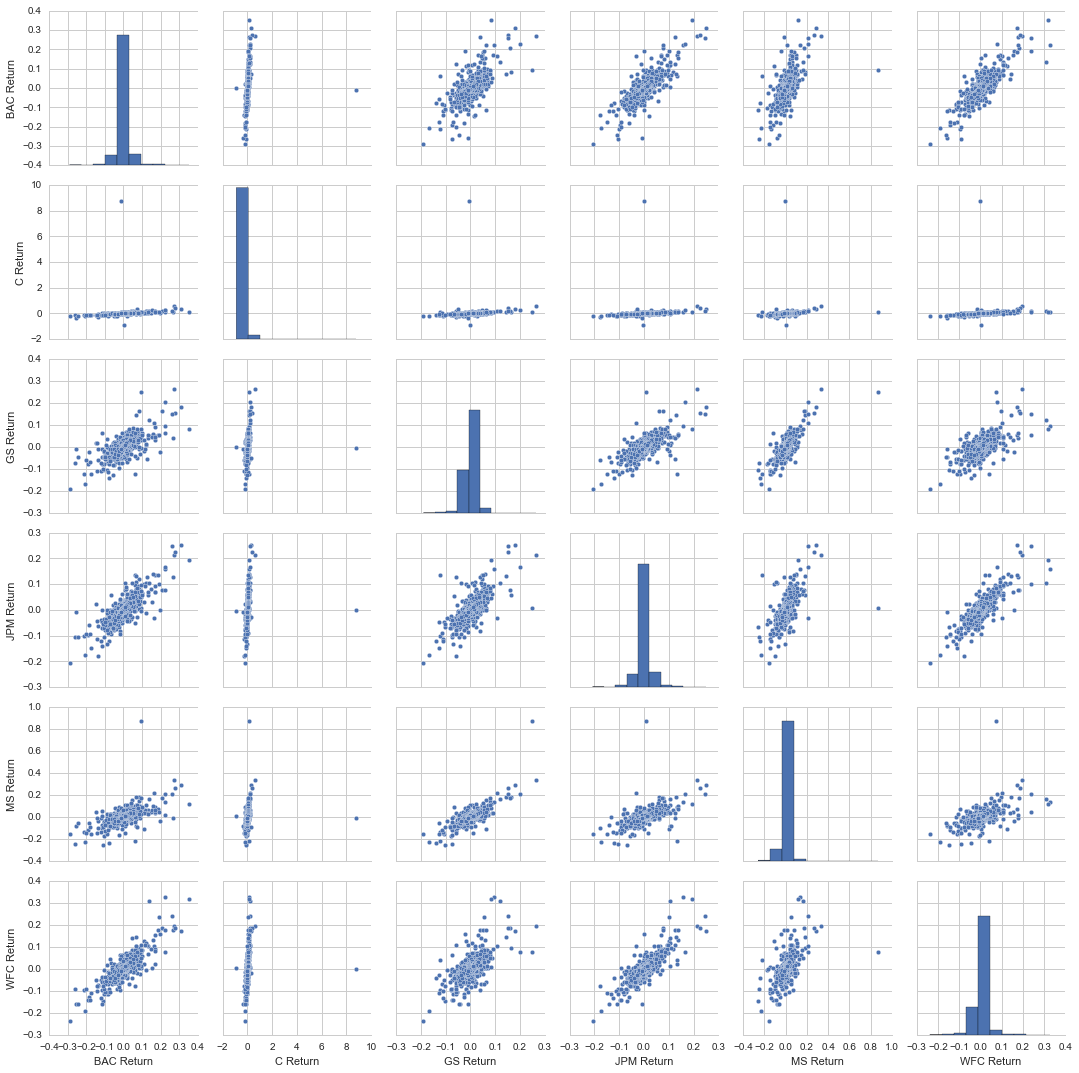

** Using this returns DataFrame, we'll figure out on what dates each bank stock had the best and worst single day returns. we should notice that 4 of the banks share the same day for the worst drop**

In [11]:
returns.idxmin()

BAC Return    2009-01-20
C Return      2009-02-27
GS Return     2014-08-13
JPM Return    2014-08-13
MS Return     2008-10-09
WFC Return    2009-01-20
dtype: object

In [52]:
returns.idxmax()

BAC Return    2009-04-09
C Return      2011-05-09
GS Return     2008-11-24
JPM Return    2009-01-21
MS Return     2008-10-13
WFC Return    2008-07-16
dtype: object

** Taking a look at the standard deviation of the returns, which stock would you classify as the riskiest over the entire time period? Which would you classify as the riskiest for the year 2015?**

In [12]:
returns.std()

BAC Return    0.037006
C Return      0.178695
GS Return     0.026055
JPM Return    0.028651
MS Return     0.038278
WFC Return    0.030493
dtype: float64

In [13]:
returns[(returns.index >= '2015-01-01') & (returns.index <= '2015-12-31')].std()

BAC Return    0.016163
C Return      0.015289
GS Return     0.014046
JPM Return    0.014017
MS Return     0.016249
WFC Return    0.012591
dtype: float64

** Creating a distplot using seaborn of the 2015 returns for Morgan Stanley **

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MS Return', ylabel='Density'>

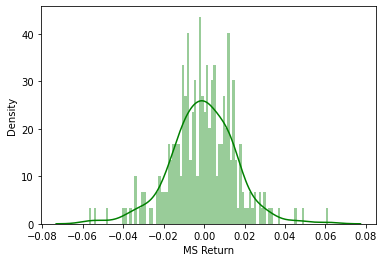

In [22]:
sns.distplot(returns[(returns.index >= '2015-01-01') & (returns.index <= '2015-12-31')]['MS Return'],bins = 100,color='green')

** Creating a distplot using seaborn of the 2008 returns for CitiGroup **

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='C Return', ylabel='Density'>

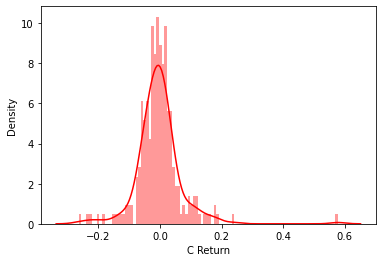

In [24]:
sns.distplot(returns[(returns.index >= '2008-01-01') & (returns.index <= '2008-12-31')]['C Return'],bins = 100,color = 'red')

____
# More Visualization

### Imports

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

** Creating a line plot showing Close price for each bank for the entire index of time. **

In [13]:
bank_stocks.index = pd.to_datetime(bank_stocks.index).sort_values()
plotly.express.line(bank_stocks.xs(key='close',axis=1,level='Stock Info'),width=1000,height=550)

## Moving Averages

Let's analyze the moving averages for these stocks in the year 2008. 

** Plotting the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008**

Text(0.5, 0, 'Date')

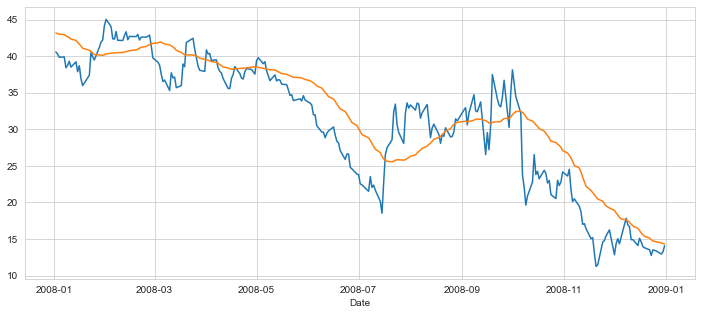

In [25]:
mov_avg = bank_stocks.xs(key='close',axis=1,level='Stock Info')[(bank_stocks.index >= '2008-01-01') & (bank_stocks.index <= '2008-12-31')]['BAC']
close = (bank_stocks.xs(key='close',axis=1,level='Stock Info').rolling(30).mean()[(bank_stocks.index >= '2008-01-01') & (bank_stocks.index <= '2008-12-31')]['BAC'])
fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot()
ax.plot(mov_avg)
ax.plot(close)
ax.set_xlabel('Date')

** Heatmap of the correlation between the stocks Close Price.**

<AxesSubplot:xlabel='Bank Ticker', ylabel='Bank Ticker'>

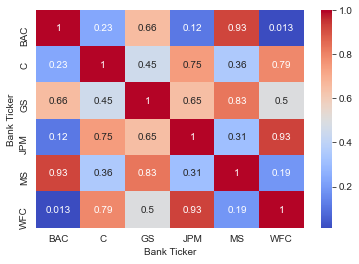

In [36]:
sns.heatmap(bank_stocks.xs(key='close',axis=1,level='Stock Info').corr(),  annot=True,cmap='coolwarm')

** Using seaborn's clustermap to cluster the correlations together:**

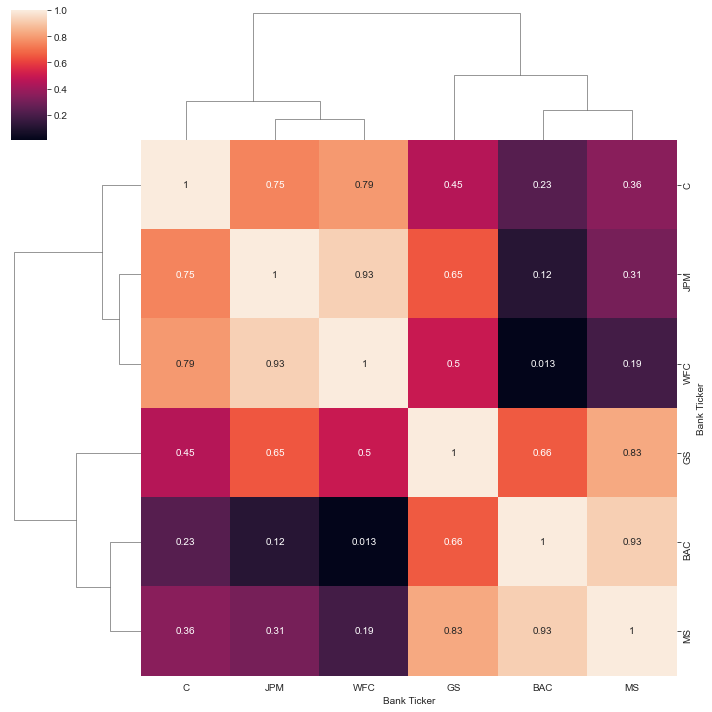

In [38]:
sns.clustermap(bank_stocks.xs(key='close',axis=1,level='Stock Info').corr(),annot=True)

In [44]:
bank_stocks.xs(key='BAC',axis=1).dropna()

Stock Info,open,high,low,close,volume
date,,,,,
2007-01-03,53.40,54.180,52.99,53.33,16028300.0
2007-01-04,53.33,53.890,53.05,53.67,13236800.0
2007-01-05,53.59,53.590,53.03,53.24,10205000.0
2007-01-08,53.46,53.640,52.80,53.45,9685900.0
2007-01-09,53.60,53.710,52.97,53.50,12550500.0
...,...,...,...,...,...
2016-12-19,22.51,22.650,22.43,22.60,38187752.0
2016-12-20,22.71,22.735,22.54,22.61,39988630.0
2016-12-21,22.62,22.670,22.26,22.33,52652949.0


# Part 2 

In this second part of the project we will rely on the cufflinks library to create some Technical Analysis plots. This part of the project is experimental due to its heavy reliance on the cuffinks project.

** Using .iplot(kind='candle) to create a candle plot of Bank of America's stock from Jan 1st 2015 to Jan 1st 2016.**

In [52]:
bank_stocks.xs(key='BAC',axis=1)[(bank_stocks.index >= '2015-01-01') & (bank_stocks.index <= '2016-01-01')].iplot(kind='candle')

** Using .ta_plot(study='sma') to create a Simple Moving Averages plot of Morgan Stanley for the year 2015.**

In [49]:
bank_stocks.xs(key='MS',axis=1)[(bank_stocks.index >= '2015-01-01') & (bank_stocks.index <= '2015-12-31')]['close'].ta_plot(study='sma')

**Using .ta_plot(study='boll') to create a Bollinger Band Plot for Bank of America for the year 2015.**

In [48]:
bank_stocks.xs(key='BAC',axis=1)[(bank_stocks.index >= '2015-01-01') & (bank_stocks.index <= '2015-12-31')]['close'].ta_plot(study='boll') 

# End of the project :)
